In [38]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [39]:
# Load the dataset
with open('./Movies.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('./Movies.csv', encoding=result['encoding'])

print(df.head())

                                  Title  Production_Budget  Worldwide_Gross  \
0  Star Wars Ep. VII: The Force Awakens          306000000       2064615817   
1               Spider-Man: No Way Home          200000000       1910041582   
2                          The Avengers          225000000       1515100211   
3                     Top Gun: Maverick          170000000       1488732821   
4     Star Wars Ep. VIII: The Last Jedi          262000000       1331635141   

   Release_Year    CPI Duration MPAA_Rating  IMDb_Rating Voter_Numbers   Genre  
0        2015.0  237.0   2h 18m       PG-13          7.8          931K  Action  
1        2021.0  271.0   2h 28m       PG-13          8.3          752K  Action  
2        2012.0  229.6   2h 23m       PG-13          8.0          1.4M  Action  
3        2022.0  294.4   2h 10m       PG-13          8.4          454K  Action  
4        2017.0  245.1   2h 32m       PG-13          6.9          633K  Action  


# Analysis

In [40]:
# Find variables with missing values
print(df.isnull().sum())

Title                  0
Production_Budget      0
Worldwide_Gross        0
Release_Year          19
CPI                   22
Duration             112
MPAA_Rating           64
IMDb_Rating           62
Voter_Numbers         61
Genre                 25
dtype: int64


In [41]:
# Five-Number Summary
five_number_summary = df['Worldwide_Gross'].describe(percentiles=[0.25, 0.5, 0.75])

# Mean and Standard Deviation
mean = df['Worldwide_Gross'].mean()
std_dev = df['Worldwide_Gross'].std()

# Combine results into a summary DataFrame
summary = pd.DataFrame({
    'Statistic': ['Minimum', 'Q1', 'Median', 'Q3', 'Maximum', 'Mean', 'Standard Deviation'],
    'Value': [
        five_number_summary['min'],
        five_number_summary['25%'],
        five_number_summary['50%'],
        five_number_summary['75%'],
        five_number_summary['max'],
        mean,
        std_dev
    ]
})

print(summary)


            Statistic         Value
0             Minimum  0.000000e+00
1                  Q1  4.193096e+06
2              Median  2.587314e+07
3                  Q3  9.781875e+07
4             Maximum  2.064616e+09
5                Mean  9.672043e+07
6  Standard Deviation  1.963703e+08


# Adjusted production budget analysis

In [42]:
# Drop release year and CPI missing values
df = df.dropna(subset=['Release_Year', 'CPI'])

# Add a new column with the adjusted production budget
CPI_2022 = 294.4
def getAdjustedProductionBudget(cpi, budget):
    return budget * (CPI_2022 / cpi)

df['Adjusted_Production_Budget'] = df.apply(lambda row: getAdjustedProductionBudget(row['CPI'], row['Production_Budget']), axis=1)

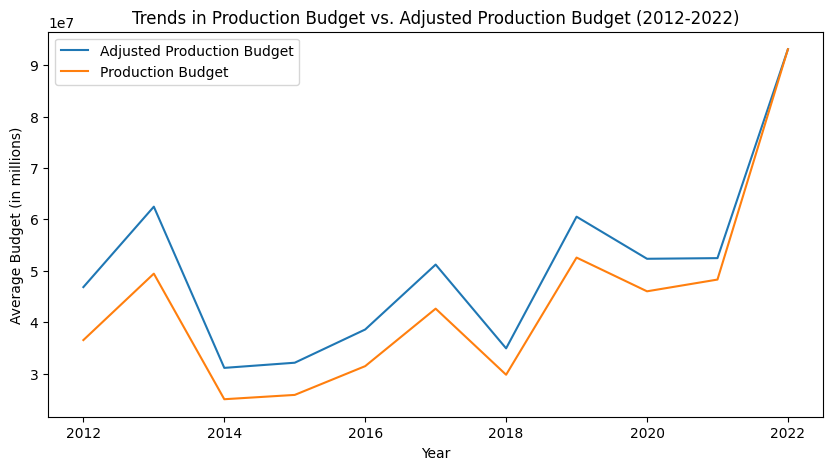

In [54]:
# Filter out only the rows for the years 2012-2022
df = df[df['Release_Year'] >= 2012]
df = df[df['Release_Year'] <= 2022]

# Plot the adjusted production budget and production budget against year
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Release_Year'], y=df['Adjusted_Production_Budget'], label='Adjusted Production Budget', errorbar=None)
sns.lineplot(x=df['Release_Year'], y=df['Production_Budget'], label='Production Budget', errorbar=None)
plt.xlabel("Year")
plt.ylabel("Average Budget (in millions)")
plt.title("Trends in Production Budget vs. Adjusted Production Budget (2012-2022)")
plt.legend()
plt.show()